In [1]:
import os
from PIL import Image
import kagglehub

dataset_root = kagglehub.dataset_download("act18l/smallcifar10")

# Define class names
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def load_split(split):
    split_dir = os.path.join(dataset_root, split)
    files = sorted(os.listdir(split_dir))  # sort by filename

    images = []
    labels = []

    for fname in files:
        # Extract class from filename: '0_cat.png' -> 'cat'
        label_name = fname.split("_")[1].split(".")[0]
        labels.append(classes.index(label_name))

        # Load image as NumPy array
        img = np.array(Image.open(os.path.join(split_dir, fname)).convert("RGB"))
        images.append(img)

    images = np.stack(images)      # [N,H,W,3]
    labels = np.array(labels)      # [N]
    return images, labels

# Load train and test
train, train_labels = load_split("train")
test, test_labels = load_split("test")

print("Train:", train.shape, train_labels.shape)
print("Test:", test.shape, test_labels.shape)


Using Colab cache for faster access to the 'smallcifar10' dataset.
Train: (5000, 32, 32, 3) (5000,)
Test: (10000, 32, 32, 3) (10000,)


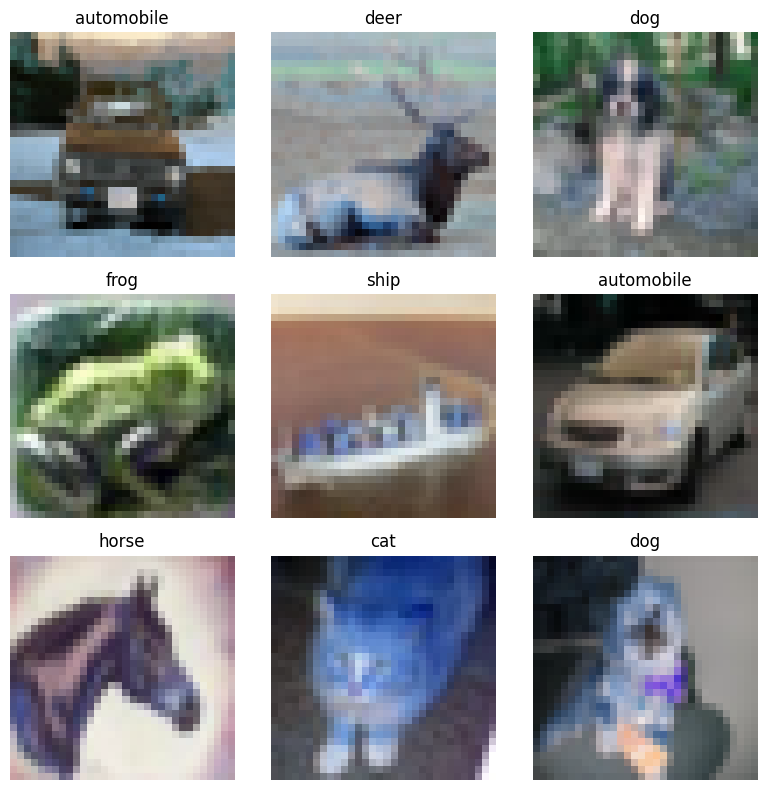

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Number of examples to show
num_examples = 9

# Randomly pick indices
indices = np.random.choice(len(train), num_examples, replace=False)

# Plot images in a grid
plt.figure(figsize=(8, 8))
for i, idx in enumerate(indices):
    img = train[idx]
    label = classes[train_labels[idx]]

    plt.subplot(3, 3, i+1)
    plt.imshow(img)  # img is HWC, 0-255
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()
